# Mountain Car Problem, Q-learning to the Rescue!
##### Louise Y Lai and Gokul Krishna

The objective of this project is to implement the Mountain Car problem from OpenAI as a reinforcement learning problem, specifically through Q-learning.

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

## Making an environment

In [3]:
env = gym.make('MountainCar-v0') # this simply imports the environment
env.reset()

array([-0.50620985,  0.        ])

## create Q table

In [2]:
def create_q_table(environment, num_states, low=-1, high=1):
    return np.random.uniform(low, high, size=(num_states[0],
                                              num_states[1],
                                              environment.action_space.n))

In [4]:
def find_states(environment):
    # figures out the state space
    return np.round((environment.observation_space.high - 
                     env.observation_space.low) * np.array([10, 100])).astype(int) + 1

## QLearning Function

In [10]:
def QLearning(env, learning, discount, epsilon, min_eps, episodes):

    num_states = find_states(environment=env)  # get num states
    # create Q table
    Q = create_q_table(environment=env, num_states=num_states)
    reward_list = []
    ave_reward_list = []
    # calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps) / episodes

    # run Q learning algorithm
    for i in range(episodes):
        done = False
        tot_reward, reward = 0, 0
        state = env.reset()

        # discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)

        while done != True:

            # render environment for last five episodes
            if i >= (episodes - 20):
                pass
                #env.render()

            # determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]])
            else:
                action = np.random.randint(0, env.action_space.n)

            # get next state and reward
            state2, reward, done, info = env.step(action)

            # discretize state2
            state2_adj = (state2 - env.observation_space.low) * \
                np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)

            # allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward

            # adjust Q value for current state
            else:
                delta = learning*(reward +
                                  discount*np.max(Q[state2_adj[0],
                                                    state2_adj[1]]) -
                                  Q[state_adj[0], state_adj[1], action])
                Q[state_adj[0], state_adj[1], action] += delta

            # update variables
            tot_reward += reward
            state_adj = state2_adj

        # decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction

        # track rewards
        reward_list.append(tot_reward)

        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []

        if (i+1) % 100 == 0:
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))

    env.close()

    return ave_reward_list

In [11]:
# run Q-learning algorithm
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 3000)

Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -199.74
Episode 2000 Average Reward: -199.44
Episode 2100 Average Reward: -199.89
Episode 2200 Average Reward: -198.46
Episode 2300 Average Reward: -199.64
Episode 2400 Average Reward: -194.84
Episode 2500 Average Reward: -199.06
Episode 2600 Average Reward: -198.53
Episode 2700 Average Reward: -195.93
Episode 2800 Average Reward:

In [14]:
%matplotlib inline

Text(0.5, 1.0, 'Average Reward vs Episodes')

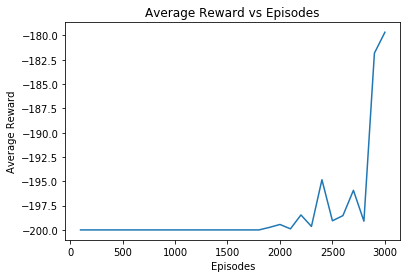

In [16]:
# plot rewards
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
# plt.savefig('rewards.jpg')
# plt.close()